<a href="https://colab.research.google.com/github/2IS239-Data-Analytics/laboration2-grupp-5/blob/master/Laboration_2_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboration 2 part 1: 

In this first part of laboration 2 you will practice some aspects of data wrangling and descriptive statistics on a structured dataset. 

Make sure to read all instructions carefully and also to answer all questions. Questions are marked with **Q** in the laboration. Always answer these questions directly after it is posed, using markdown language. 

There are also a number of coding exercises without specific questions attached. These also have to be coded in order to pass the laboration. 

The dataset used in this laboration is called *modcloth_final_data.json* and is located in the data folder in the repository for laboration 2. 

To hand in the laborations only provide the link to the finished Colaboratory notebook in Studium, or hand in a HTML-file with all the cells executed to show the output. 

Good luck!



 Copyright 2018 Aditya Agrawal

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

The content in this notebook has been subjected to changes in order to make it fit with the course Data Analytics 2IS239 at Uppsala University Campus Gotland.


### About the dataset

>This dataset contains self-reported clothing-fit feedback from customers as well as other side information like reviews, ratings, product categories, catalog sizes, customers’ measurements (etc.) from [Modcloth](http://modcloth.com)

>ModCloth sells women’s vintage clothing and accessories, from which the curator of the dataset collected data from three categories: dresses, tops, and bottoms. RentTheRunWay is a unique platform that allows women to rent clothes for various occasions; they collected data from several categories. 
>
>**Note:** In the dataset, fit feedback belongs to one of three classes: ‘Small,’ ‘Fit,’ and ‘Large.’ 

Start you work by importing the following libraries that you will use during this part of the lab. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing all warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rc('figure', figsize = (20, 8))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

#  [Modcloth](http://modcloth.com) Dataset

## Importing data using Pandas

The following lines of code imports the json dataset into a pandas dataframe, given that the file is stored in your gdrive. This requires you to clone your repo into gDrive. If you want to, you can also get it directly from your repository at GitHub or upload it from your local computer (if you have cloned your repository on your local computer).

If you are interested in creating your own solutions that perhaps are nicer than this, please see for instance: 

[Connecting github to Colaboratory](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)




In [2]:
#Mounting gDrive in Colaboratory
try:
    from google.colab import drive
    drive.mount("/content/drive/", force_remount=True)
    google_drive_prefix = "/content/drive/My Drive"
    data_prefix = "{}/mnist/".format(google_drive_prefix)
except ModuleNotFoundError: 
    data_prefix = "data/"


Mounted at /content/drive/


To change directory to the folder where the files you want to work with are located you have to use magic commands. See for instance [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html), or [here](https://www.tutorialspoint.com/jupyter/ipython_magic_commands.htm)

In [3]:
#Change directory to my folder for analytics labs where I have cloned my gitHub repositories with magic command.

%cd drive/My Drive/Data_analytics_lab

[Errno 2] No such file or directory: 'drive/My Drive/Data_analytics_lab'
/content


### Reading JSON file

Using the pd.read_json() function the json file is brought into a pandas DataFrame, with the *lines* parameter as *True*- because every new object is separated by a new line. 

In [4]:
#Read file and view first ten rows
mc_df= pd.read_json("/content/drive/MyDrive/modcloth_final_data.json", lines=True)

mc_df.head(10)


,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
5,123373,27.0,11,5.0,c,41.0,36.0,new,NaN,5ft 4in,Doreenajane,just right,small,162012,NaN,NaN,NaN,NaN
6,123373,26.0,5,1.0,b,NaN,32.0,new,NaN,5ft 3in,barbiejenks,just right,large,114843,NaN,NaN,NaN,NaN
7,123373,NaN,11,5.0,d,42.0,38.0,new,NaN,5ft 5in,brettloie,just right,small,58869,8.5,NaN,NaN,NaN
8,123373,NaN,30,4.0,d,50.0,42.0,new,NaN,5ft 10in,francescaviola,just right,small,279568,11.0,wide,NaN,NaN
9,123373,NaN,13,5.0,dd/e,41.0,36.0,new,39,5ft 6in,laurenpolzin,just right,fit,950172,9.0,NaN,NaN,NaN


Time to investigate our dataframe. Answer the following questions:

**Q**

>
>Which datatypes are in our dataframe? What does it tell us about our data in regards to scale (HINT! Measurement scale:Nominal,Ordinal,Inverval,Ratio. Continous/Kategorial data)
>
>How many rows and columns?
>
>What does the first column represent?

Interpretetion of features: 

The following features exist in our data, describe shortly how you interpret them and how the data has been collected (to your understanding): 

- item_id:
- waist:
- size:
- quality:
- cup size:
- hips:
- bra size:
- category:
- bust:
- height:
- user_name:
- length:
- fit:
- user_id:




In [5]:
#Which datatypes are in our dataframe?
print(f'{mc_df.dtypes}\n')
# int64, float64 and object with the majority being object. 

# How many rows and columns?
# 18 columns and 82790 rows.
print(f'Column count: \t {len(mc_df.columns)} \nRow count: \t {len(mc_df)}')

item_id             int64
waist             float64
size                int64
quality           float64
cup size           object
hips              float64
bra size          float64
category           object
bust               object
height             object
user_name          object
length             object
fit                object
user_id             int64
shoe size         float64
shoe width         object
review_summary     object
review_text        object
dtype: object

Column count: 	 18 
Row count: 	 82790


**Q** 

**Answer** 
>
>Which datatypes are in our dataframe? What does it tell us about our data in regards to scale (HINT! Measurement scale:Nominal,Ordinal,Inverval,Ratio. Continous/Kategorial data)
>
>**How many rows and columns?**
>
>18 columns and 82790 rows
>
>**What does the first column represent?**

**Interpretetion of features:** 

**The following features exist in our data, describe shortly how you interpret them and how the data has been collected (to your understanding):**

To our understanding, the data was collected from customer's fit feedback online from the site.Customer feedback, user details and product details were combined to create the dataset.

* item_id: Item id to which item feedback is aimed at. Nominal, because no use in viewing it as quantitative despite the values being numbers. For example, no benefit to find the mean of this feature.

* waist: Waist measurement. Discrete interval, because there’s an equal difference between each value.

* size: Size of item. Discrete interval, because there’s an equal difference between each value.

* quality: Customer rating from feedback. Discrete interval, because there’s an equal difference between each value.

* cup size: Customers cup size based on item. Ordinal, provides a size order in alphabetical characters.

* hips: Customers hip measurement. Discrete Interval, because there’s an equal difference between each value.

* bra size: Customers bra size.  Discrete Interval, because there’s an equal difference between each value.

* category: product category. Nominal, cannot be ranked. 

* bust: Customers bust measurement. Discrete Interval, because there’s an equal difference between each value.

* height: Customers height, Continuous ratio.

* user_name: Customers username nominal.

* fit: Customers feedback according about items fit. Ordinal, can be ranked. 

* user_id: Customers user id. Nominal, because no use in viewing it as quantitative despite the values being numbers. For example, no benefit to find the mean of this feature.





<a id="4"></a>
# EDA - Exploratory Data Analysis

We can already make few observations here, by looking at the head of the data:
1. There are missing values across the dataframe, which need to be handled.
2. Cup-size contains multiple preferences- which will need handling, if we wish to define cup sizes as 'category' datatype.
3. Height column needs to be parsed for extracting the height in a numerical quantity, it looks like a string (object) right now.
4. Not so important, but some columns could do with some renaming- for removing spaces. One is also using a name `size` that could cause trouble since it is a word used by Pandas, this should be changed.

Firstly, we handle the naming of columns for ease-of-access in pandas. It is inconvenient with spaces so remove all of them and replace them with _. Further size is a the keyword in pandas, so we better make sure to change the feature name "size" to some user defined name like "mc_size".

In [6]:
#replace white spaces with _ and view dataframe to confirm
mc_df.columns =mc_df.columns.str.replace(r'\s+', '_')

mc_df.head(10)


,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
5,123373,27.0,11,5.0,c,41.0,36.0,new,NaN,5ft 4in,Doreenajane,just right,small,162012,NaN,NaN,NaN,NaN
6,123373,26.0,5,1.0,b,NaN,32.0,new,NaN,5ft 3in,barbiejenks,just right,large,114843,NaN,NaN,NaN,NaN
7,123373,NaN,11,5.0,d,42.0,38.0,new,NaN,5ft 5in,brettloie,just right,small,58869,8.5,NaN,NaN,NaN
8,123373,NaN,30,4.0,d,50.0,42.0,new,NaN,5ft 10in,francescaviola,just right,small,279568,11.0,wide,NaN,NaN
9,123373,NaN,13,5.0,dd/e,41.0,36.0,new,39,5ft 6in,laurenpolzin,just right,fit,950172,9.0,NaN,NaN,NaN


In [7]:
#Rename size to mc_size and view dataframe to confirm
#Your code here
#Rename specific column
mc_df.rename(columns={'size' : 'mc_size'}, inplace = True)
mc_df.head(10)

,item_id,waist,mc_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
5,123373,27.0,11,5.0,c,41.0,36.0,new,NaN,5ft 4in,Doreenajane,just right,small,162012,NaN,NaN,NaN,NaN
6,123373,26.0,5,1.0,b,NaN,32.0,new,NaN,5ft 3in,barbiejenks,just right,large,114843,NaN,NaN,NaN,NaN
7,123373,NaN,11,5.0,d,42.0,38.0,new,NaN,5ft 5in,brettloie,just right,small,58869,8.5,NaN,NaN,NaN
8,123373,NaN,30,4.0,d,50.0,42.0,new,NaN,5ft 10in,francescaviola,just right,small,279568,11.0,wide,NaN,NaN
9,123373,NaN,13,5.0,dd/e,41.0,36.0,new,39,5ft 6in,laurenpolzin,just right,fit,950172,9.0,NaN,NaN,NaN


### Unique number of observations for each feature

If the dataset is having less number of observations then we can see the unique values for each feature(There are 82790 observations in the dataset). We will therefore list the number of unique observations for each feature in the dataset. (**HINT!** There is a built in function for this in Pandas)

In [8]:
#Investigate the number of unique values for each feature
#Your code here

# Using funcion nunique to get amount of unique observations of each column.
mc_df.nunique() 

item_id            1378
waist                31
mc_size              29
quality               5
cup_size             12
hips                 31
bra_size             11
category              7
bust                 40
height               41
user_name         32429
length                5
fit                   3
user_id           47958
shoe_size            15
shoe_width            3
review_summary    61713
review_text       73313
dtype: int64

* Many of the columns have string values (object as datatype) how should we handle them to make them into usable columns for analysis? 

* Turn string object that should be numeric data to a correct format (**HINT!** Are they categorial or continous). 

* Out of the 18 columns, how many columns have complete data?

**Q** 

**Answer** 

**Many of the columns have string values (object as datatype) how should we handle them to make them into usable columns for analysis?**

We can extract the values and turn them into other datatypes
For example: df['Boolean'] = df['stringData'].str.extract('(\d)', expand=True)

**Turn string object that should be numeric data to a correct format (HINT! Are they categorial or continous).**

bust: str --> to_numeric
mc_df['bust'] = pd.to_numeric(mc_df['bust'],errors='coerce')

**Out of the 18 columns, how many columns have complete data**
answer: 6


In [9]:
# We can use the function to_numeric() to convert a string to a suitable numeric

# Changing bust from object to numeric
mc_df['bust'] = pd.to_numeric(mc_df['bust'], errors='coerce')
print(f'{mc_df.dtypes}\n')

## Complete data
# Checking isnull for entire dataframe. The Columns which has value means that they are complete.
# Anwser: item_id, size, category, user_name, fit, user_id
print(f'{mc_df.isnull().sum()}') # visually see the null values 

print('Columns with complete data:', len(mc_df.columns)- mc_df.isna().any().sum()) # get answer (6 with complete data)

item_id             int64
waist             float64
mc_size             int64
quality           float64
cup_size           object
hips              float64
bra_size          float64
category           object
bust              float64
height             object
user_name          object
length             object
fit                object
user_id             int64
shoe_size         float64
shoe_width         object
review_summary     object
review_text        object
dtype: object

item_id               0
waist             79908
mc_size               0
quality              68
cup_size           6255
hips              26726
bra_size           6018
category              0
bust              70937
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe_size         54875
shoe_width        64183
review_summary     6725
review_text        6725
dtype: int64
Columns with complete data: 6


### Identifying outliers

* Visualise all the different numerical values in order to identify possible outliers in each of these. Code is provided that define a function for making a boxplot for a feature. 

  **Q**: 
  * How does a boxplot help us identify outliers in single features?
  

The code below define a function which can be used to make boxplot for any numeric feature in the dataset. It will be convenient to use several times, therefore it has been made into a function so you can call it with different features to investigate outliers. 



In [10]:
def plot_outlier(feature):
  plt.figure(figsize=(25, 6))
  ax = sns.boxplot(x=feature, linewidth=2.5)


**Q** 
>
**Answer**

* **How does a boxplot help us identify outliers in single features?**
>
They show outlying observations as dots for unusual high and low values.

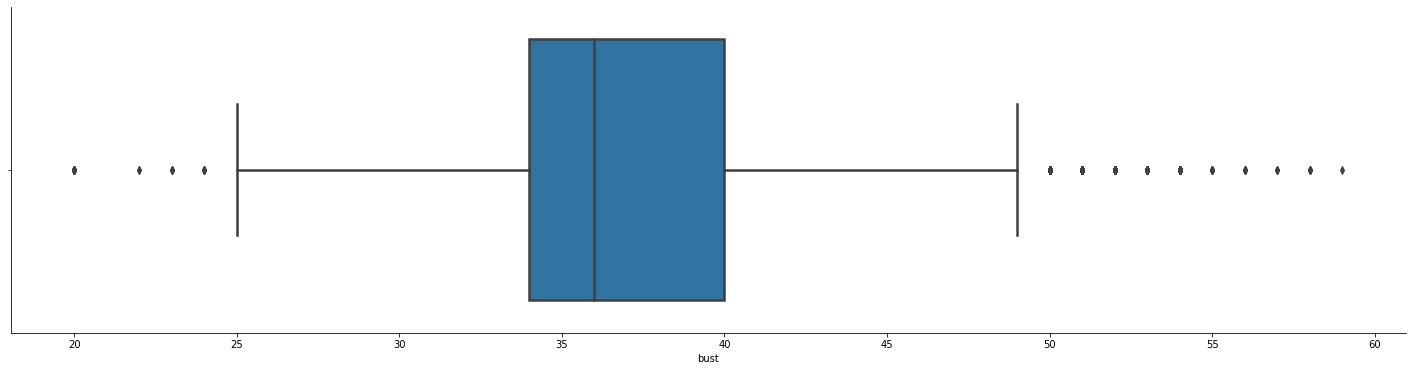

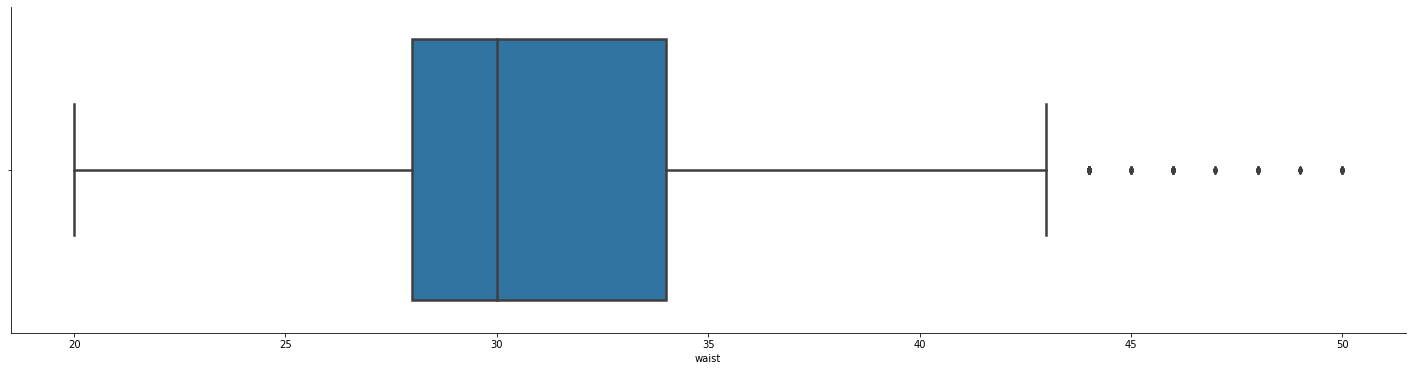

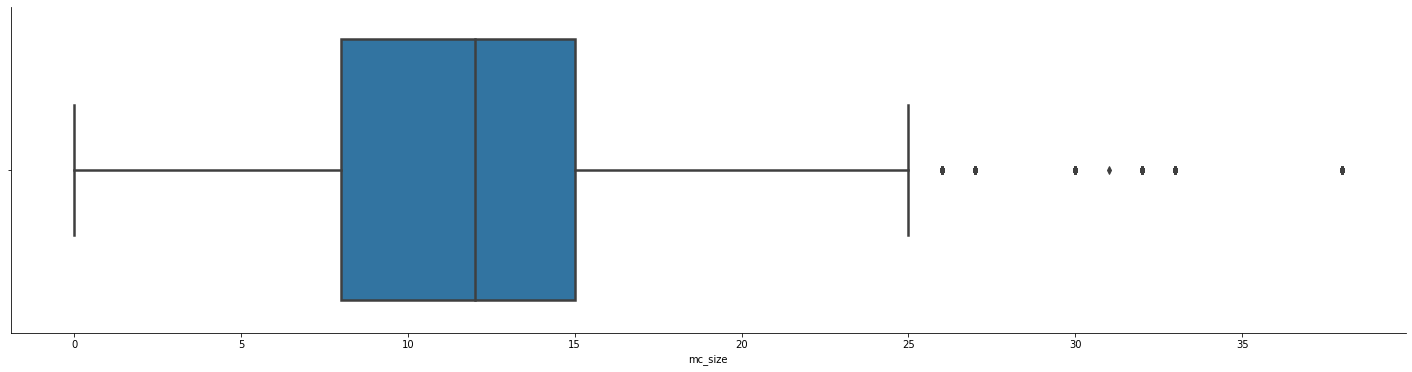

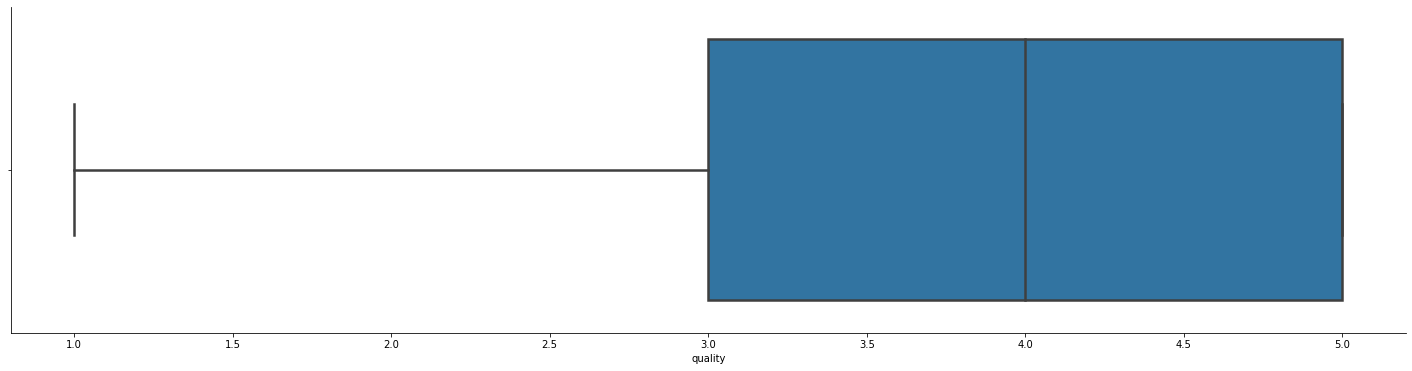

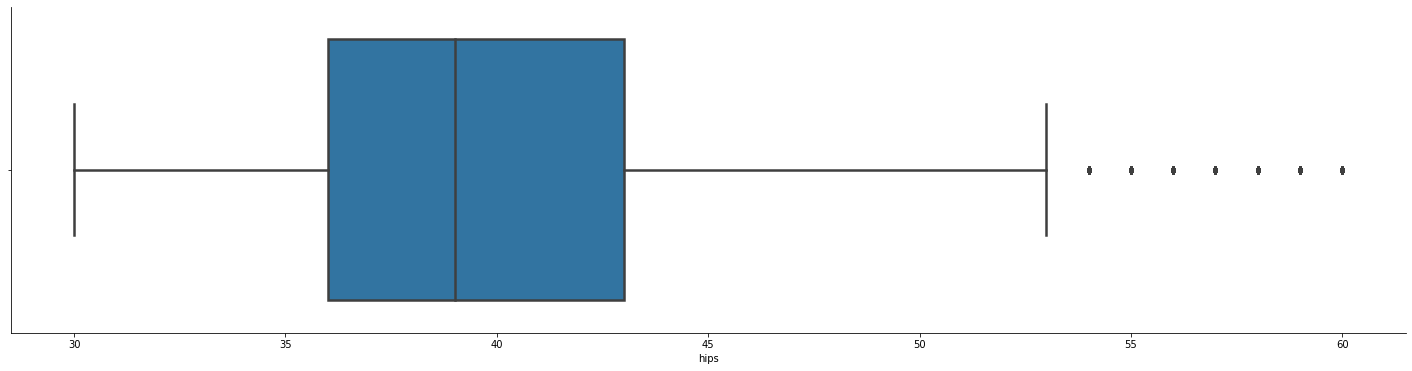

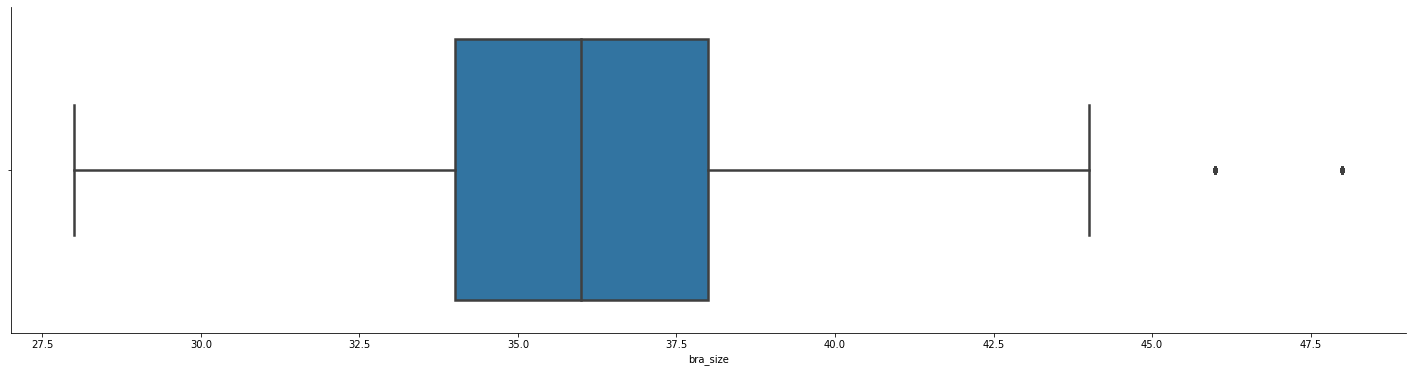

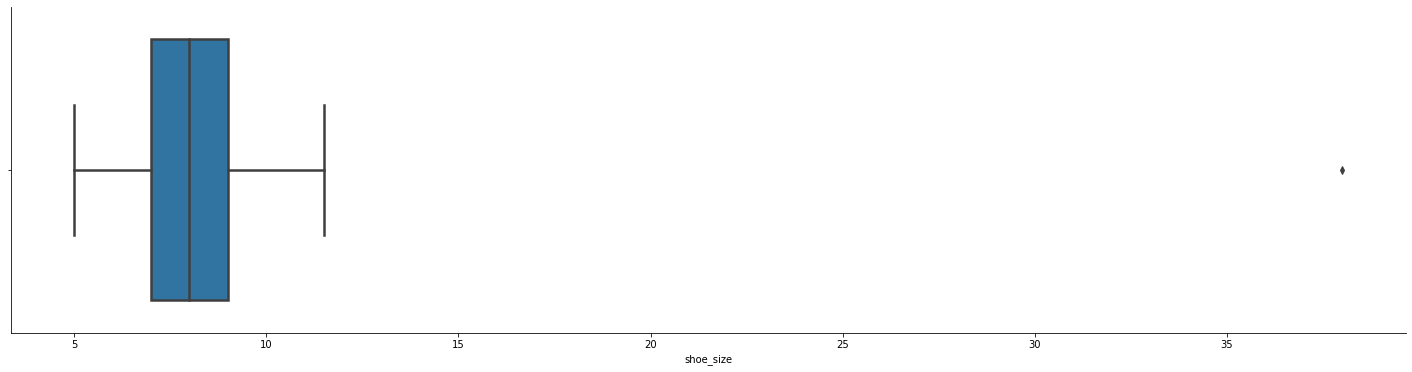

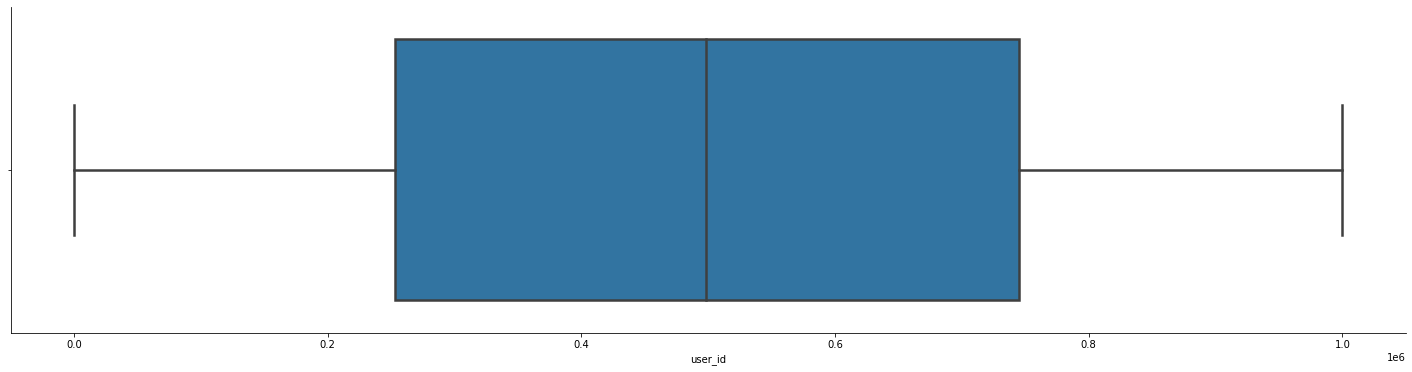

In [11]:
plot_outlier(mc_df['bust'])
plot_outlier(mc_df['waist'])
plot_outlier(mc_df['mc_size'])
plot_outlier(mc_df['quality'])
plot_outlier(mc_df['hips'])
plot_outlier(mc_df['bra_size'])
plot_outlier(mc_df['shoe_size'])
plot_outlier(mc_df['user_id'])

* Test the function with a few of the numeric variables in the dataset.

* What does the visualizations tell you about potential outliers in your tested features?

* Create a new dataframe called `missing_data` which consists of three columns, the feature, total number of missing values and the percantage of missing values for each feature. In the code cell below you have starter code that summarise the missing values and store it in a variable called `missing_data_sum`, you can use it to calculate your columns in `missing_data`.

* Investigate the missing data further, why is it missing you think and what type of missing data is it? (HINT! NMAR, MAR, MCAR)


In [12]:
#Summarise missing data and find % of missing data
missing_data_sum = mc_df.isnull().sum()
#Your code here

# Using mean() to get percentage of missing values.
missing_data_percentage = round(mc_df.isnull().mean() * 100)

# Creating dataframe 
missing_data = pd.DataFrame(list(zip(missing_data_sum.keys(), missing_data_sum, missing_data_percentage)), columns=['Feature', 'Total missing values', 'Missing value percentage'])
missing_data

,Feature,Total missing values,Missing value percentage
0,item_id,0,0.0
1,waist,79908,97.0
2,mc_size,0,0.0
3,quality,68,0.0
4,cup_size,6255,8.0
5,hips,26726,32.0
6,bra_size,6018,7.0
7,category,0,0.0
8,bust,70937,86.0
9,height,1107,1.0


**Q**
**Answer**

* **What does the visualizations tell you about potential outliers in your tested features?**

>The visualizations tells us that there are outliers for all plotted features except: quality, user_id and shoe_size.
Shoe_size only has 1 outlier and we will therefore remove this one since it doesn’t affect the overall data significantly.
There aren’t that many outliers and some of them might be from different formats being entered (like uk / us sizes). The outliers also seem to correlate with each other for bust, hips, waist, mc_size, which might mean that they might be from the same customers. 

* **Investigate the missing data further, why is it missing you think and what type of missing data is it? (HINT! NMAR, MAR, MCAR)**


>bust and waist: could be missing a lot because of stigmatization (customers don't want to enter this info), or because the customers feel this measurement is redundant since there’s a measurement for hips and bra_size already. MNAR.

>hips could either be MNAR because of the same reason as above or MAR. 30% is missing compared to 80% and above missing. Perhaps the measurement is not always relevant or missing because of unknown reasons. Customers might also feel like hips is a more relevant measurement instead of waist.

>height, cup_size and bra_size, quality and length are missing only a few random values. We think it’s MCAR since the percentage missing is very low. (< 10%).

>shoe_size and shoe_width are missing 66% and 77%, we suspect that this is due to the information not being relevant for the product. 

>Therefore it is MNAR.
review_summary and text could be MNAR - missing just because the customer didn't want to enter any text.


### Visualize the nonunique observations

Some of the observations contain less unique values than others. The below function visualise values. 

* Create a list that contains  features that you are unsure about whether they are categorial or continous and provide it to the `countplot` function *(max 5 features otherwise it takes to much time)*. 

* Which of the features would you regard as categorial and which are continous based on the visualizations?


In [13]:
def countplot(independent_features):
  plt.figure(figsize=(25, 25))
  for loc, feature in enumerate(independent_features):
    ax = plt.subplot(3, 4, loc+1)
    ax.set_xlabel('{}'.format(feature), fontsize=10)
    chart = sns.countplot(mc_df[feature])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  return None

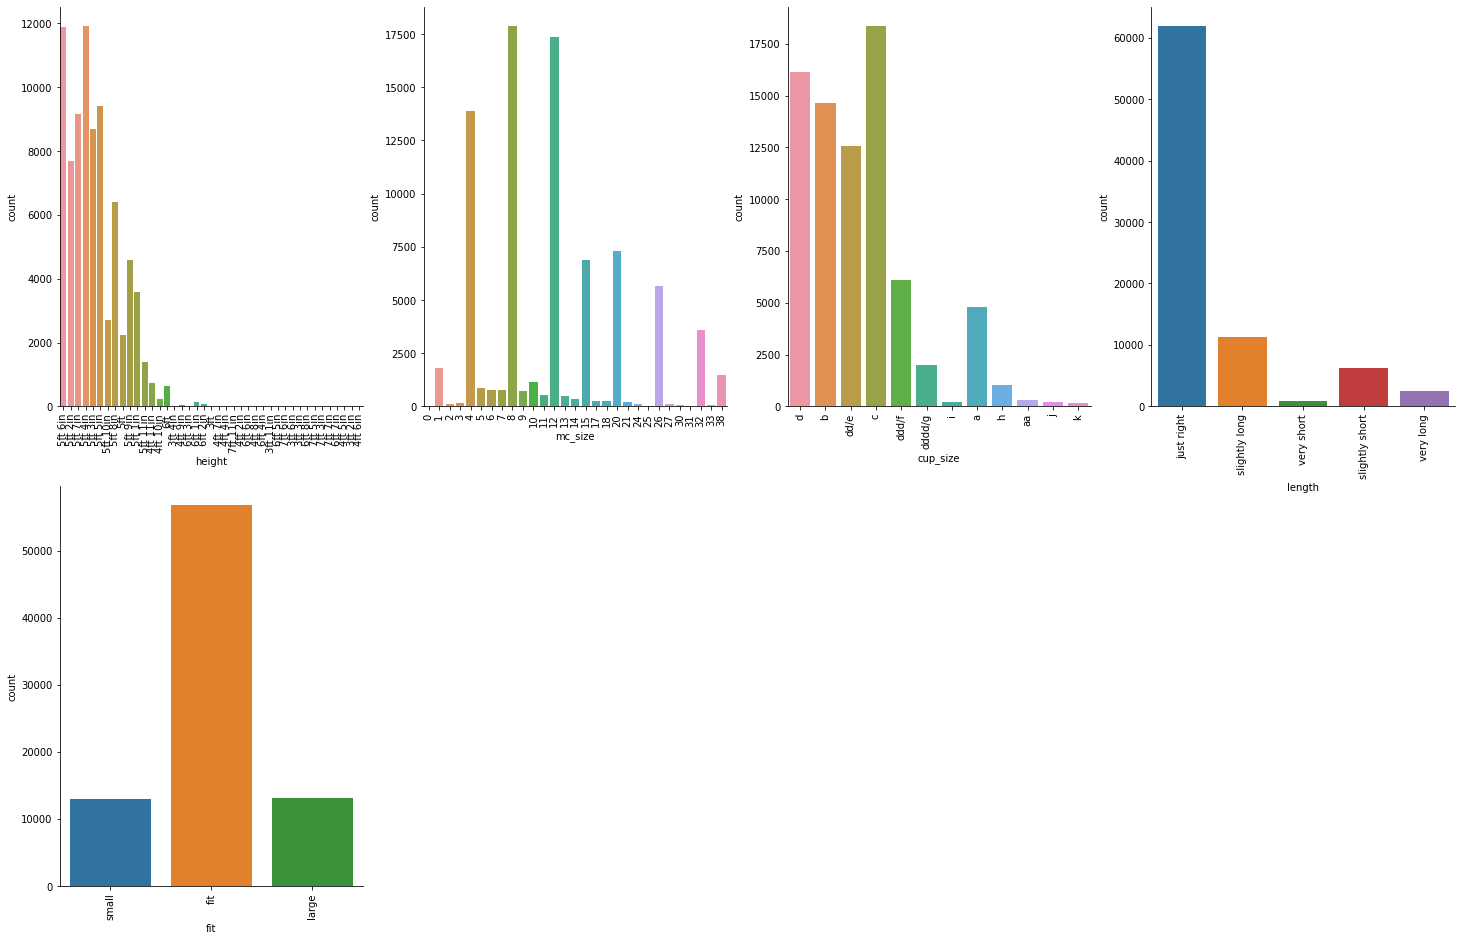

In [14]:
#List of features and call to function
#Your code here

unsure_features = ['height', 'mc_size', 'cup_size', 'length', 'fit']

countplot(unsure_features)

**Which of the features would you regard as categorial and which are continous based on the visualizations?**

>height: Continous

>mc_size: Continous

>cup_size: Categorical

>length: Categorical

>fit: Categorical


### Statistical description of numerical variables

Use the built in functions in Pandas to describe common statistics in regards to the numerical features in the dataset.

**Q** 

* What is the mean bra_size?

* What does std stand for?

In [15]:
#Statistics
#Your code here
mc_df.describe() #view count, mean, etc. for all columns

# Getting mean bra_size and rounding it 
mean_bra_size = round(mc_df['bra_size'].mean())
print(mean_bra_size) #print mean for bra_size

36


**What is the mean bra_size?**
mean bra size: 35.97 or 36 rounded

**What does std stand for?**
std stands for: standard deviation, which describes how the data is spread out, i.e. the variation of a data set. 

### Further investigation of (some) individual features



* **shoe_size**: 

  **Q**:

* How does the row(s) containing outlier(s) in the shoe_size feature look like?

* What is a suitable way of handling the identified outlier(s) in the shoe_size column? Why? Also, handle the outlier in shoe_size appropriately.



38.0

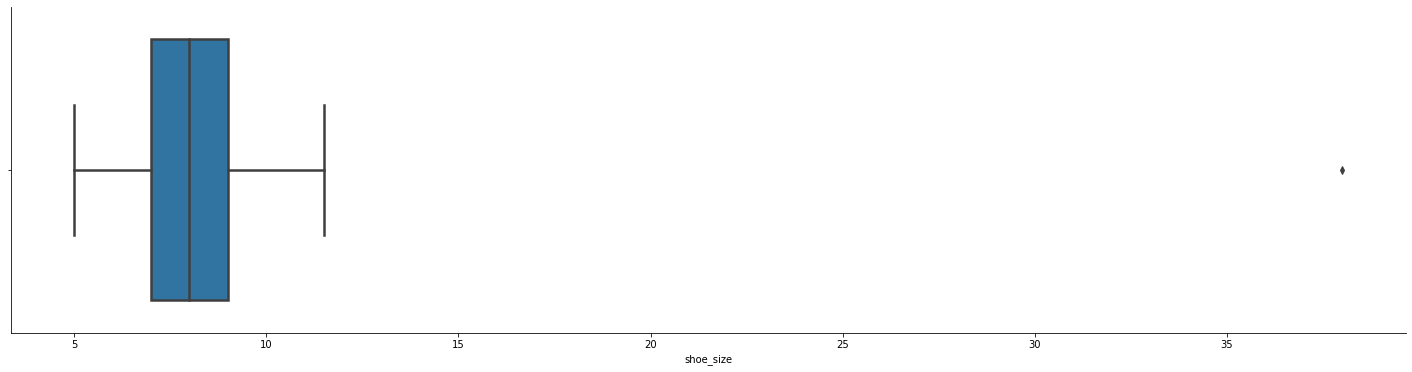

In [16]:
#View the row that contains the outlier in shoe_size
plot_outlier(mc_df.shoe_size)
mc_df.shoe_size.loc[mc_df['shoe_size'].idxmax()] # print the max row (38.0)

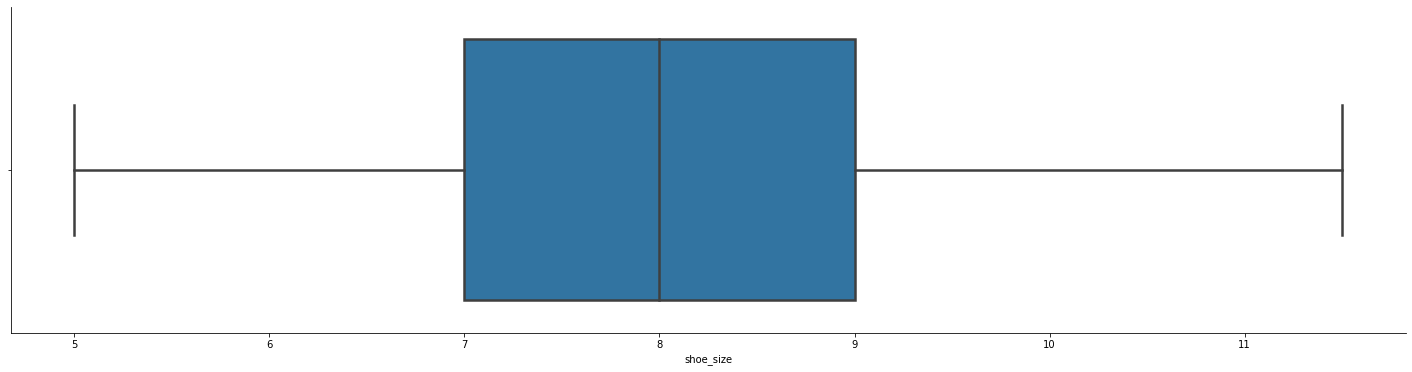

In [17]:
#Handle the outlier

# Handling the outlier by dropping rows bigger than 15 (Size 13 is equal EU size 48, so above 13 would be extremely rare under any condition) but this could be changed to exact value by setting == 38 in this case.
# However another suitable way would be to set top and bottom quartile and then remove values from the dataframe which are outside that range.
mc_df.drop(mc_df.index[mc_df['shoe_size'] > 15], inplace = True)

# Calling plot outlier again, to show that the outlier is removed.
plot_outlier(mc_df.shoe_size)

## Joint Distribution visualizations
Create a visualization that shows the joint distribution of bra_size vs size (bivariate) to get an understanding about the values.

**Q:** 
* What does the visualization tell us?

* Can you suggest and implement a visualisation that shows the relationship between the two variables in a clearer way?



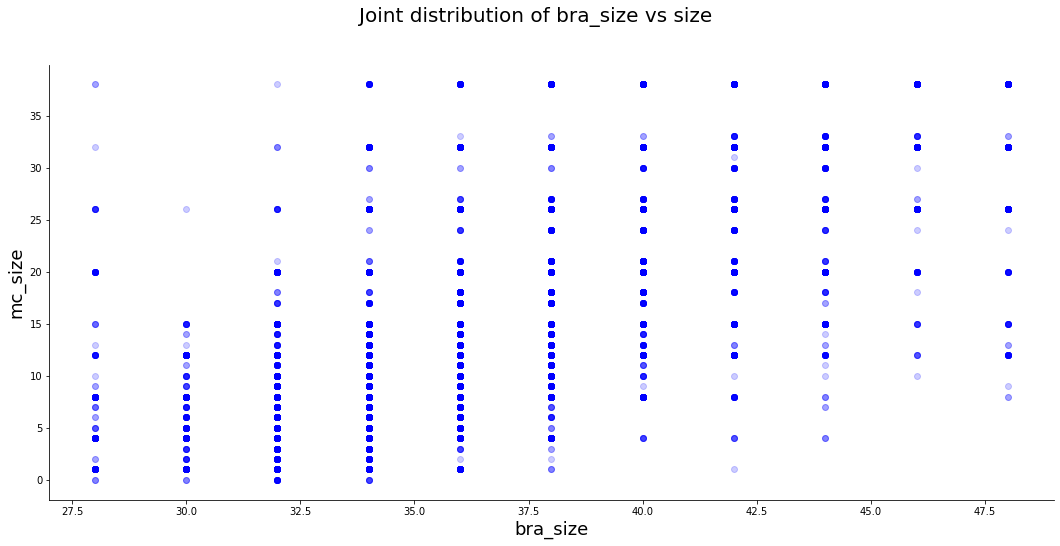

In [18]:
plt.figure(figsize=(18,8))
plt.xlabel("bra_size", fontsize=18)
plt.ylabel("mc_size", fontsize=18)
plt.suptitle("Joint distribution of bra_size vs size", fontsize= 20)
plt.plot(mc_df.bra_size, mc_df['mc_size'], 'bo', alpha=0.2)
plt.show()


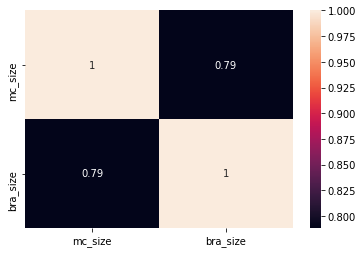

In [19]:
#Can you suggest and implement a visualisation that shows the relationship between the two variables in a clearer way?
import seaborn as sns
# generate heat map of mc_size and bra_size
sns.heatmap(mc_df[['mc_size','bra_size']].corr(),annot = True, fmt='.2g',cmap= 'rocket')

# another version 
#bra_and_mc_size = mc_df[['bra_size', 'mc_size']].copy()
#sns.jointplot(x='bra_size', y='mc_size', data=bra_and_mc_size, kind='hex') # Alternatively, setting kind="hex" will use matplotlib.axes.Axes.hexbin() to compute a bivariate histogram using hexagonal bins:

**What does the visualization tell us?**
It tells us there's a correlation between size and bra_size. Bigger size is more likely to have bigger bra size. 

## Step-by-step features processing:






* **bra_size:**  Looks numerical, but the range is only from 28 to 48, with most of the sizing lying around 34-38. 

  **Q**: What is a more sensible dtype? Change to this type instead of the present one.

  * There are some NA values, this might be due to the store not having this data (yet). Create an 'Unknown' category to replace NA values. 

In [20]:
#Fix bra_size column

# Convert bra_size to numeric and set errors to null
mc_df['bra_size'] = pd.to_numeric(mc_df['bra_size'], errors = 'coerce') 

#Replace null values with "Unknown"
mc_df['bra_size'].fillna('Unknown', inplace = True) 

# Could perhaps be converted to int as well although category might be more sensible in this case.
mc_df.bra_size = mc_df.bra_size.astype('category').cat.as_ordered() #convert data type to categorical

# Demo
mc_df['bra_size']

0             34
1             36
2             32
3        Unknown
4             36
          ...   
82785         36
82786         34
82787         32
82788    Unknown
82789         32
Name: bra_size, Length: 82789, dtype: category
Categories (12, object): [28 < 30 < 32 < 34 ... 44 < 46 < 48 < 'Unknown']

* **bust:** 

  **Q**: 
  * What can you infer by looking at the values which are not null? 
  
  * Which dtype is most suitable for bust feature?  Change into this dtype.
  
  We also need to handle a special case where bust is given as - '37-39'. Replace the entry of '37-39' with the mean. 

In [21]:
#Fix bust column

# Replacing 37-39
mc_df['bust'] = mc_df['bust'].replace(['37-39'], round(mc_df['bust'].mean()))
# Changing null values to 0
mc_df['bust'].fillna(0, inplace = True)
# Setting type to int, which is more suitable in this case.
mc_df['bust'] = mc_df['bust'].astype(int)

**What can you infer by looking at the values which are not null?**
The non-null values are all whole numbers (integers) and we therefore convert this feature to type: int.

* **category:** none missing; change to dtype category.


In [22]:
#Fix category column
mc_df['category'] = mc_df['category'].astype('category')

# Demo
mc_df['category'].dtype

CategoricalDtype(categories=['bottoms', 'dresses', 'new', 'outerwear', 'sale', 'tops',
                  'wedding'],
                 ordered=False)


* **cup_size:** Change the dtype to *category* for this column. This column has around 7% missing values. Take a look at the rows where this value is missing. 

In [23]:
#Fix cup_size column and view a sample of 20 rows where this value is missing
print(mc_df.loc[mc_df["cup_size"].isna() == True].head(20))

# Replacing empty values with Unknown
mc_df['cup_size'].fillna('Unknown', inplace = True) 

# Changing dtype to category
mc_df['cup_size'] = mc_df['cup_size'].astype('category')

# Demo
mc_df['cup_size'].dtype

     item_id  waist  mc_size  ...  shoe_width review_summary  review_text
61    124024    NaN        9  ...         NaN            NaN          NaN
70    124124    NaN       26  ...         NaN            NaN          NaN
72    124124    NaN       26  ...         NaN            NaN          NaN
99    124124    NaN       12  ...         NaN            NaN          NaN
101   124124    NaN       15  ...         NaN            NaN          NaN
107   124124    NaN       38  ...         NaN            NaN          NaN
122   124124    NaN       20  ...         NaN            NaN          NaN
145   124124    NaN       12  ...         NaN            NaN          NaN
161   124124    NaN        8  ...         NaN            NaN          NaN
184   124124    NaN       12  ...         NaN            NaN          NaN
189   124124    NaN       26  ...         NaN            NaN          NaN
199   124124    NaN       12  ...         NaN            NaN          NaN
210   124124    NaN       38  ...     

CategoricalDtype(categories=['Unknown', 'a', 'aa', 'b', 'c', 'd', 'dd/e', 'ddd/f',
                  'dddd/g', 'h', 'i', 'j', 'k'],
                 ordered=False)

>We can't see anything glaring from the rows where this data is missing, however, as per the curator of the dataset- "***Note that these datasets are highly sparse, with most products and customers having only a single transaction.***" It does point to that maybe these customers have not bought lingerie from modcloth yet and so modcloth does not have that data. So, it makes sense to fill these null values as 'Unknown'. From the prevalence of the values like dd/e, ddd/f, and dddd/g, we can assume these to be legit cup_sizes, also confirmed by [**this**](https://www.herroom.com/full-figure-bra-cup-sizing,905,30.html) article, where some brands change the cup size dd to e, ddd to f etc. We can directly convert this to *category* dtype.

* **fit:** Change the dtype to *category* for this column. 

  **Q**: 

  Which feedback has the vast majority of customers given for the fit feature for items on Modcloth?

In [24]:
#Fix fit column and find the most common value
# Changing dtype to category
mc_df['fit'] = mc_df['fit'].astype('category')

# Showing value counts, which tells us that fit is the most common feedback 
mc_df['fit'].value_counts()
# mode() can also be used
mc_df.fit.mode()

0    fit
Name: fit, dtype: category
Categories (3, object): ['fit', 'large', 'small']

* **height:** We need to parse the height column as currently it is a string object to a numerical form which is more suitable.  

Further:

  * Convert height to centimeters instead of inches and feet. This is done in the code below, comment it so it is understandable what it does.

  * How many values are missing?

  * How many outliers exist? What is suitable to do with the rows containing outliers based on this numer?

* Investigate the first 20 rows where the height data is missing. What does it tell us about the customers representing these rows?



In [25]:
#Convert inches and feet to centimeters
def height_in_cms(ht):
  if ht.lower() != 'nan':
    ht = ht.replace('ft','').replace('in', '')
    h_ft = int(ht.split()[0])
    if len(ht.split()) > 1:
      h_inch = int(ht.split()[1])
    else:
      h_inch = 0
    h_inch += h_ft * 12
    h_cm = round(h_inch * 2.54, 1)
    return h_cm

mc_df.height = mc_df.height.astype(str).apply(height_in_cms)
mc_df.head()

,item_id,waist,mc_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34,new,36,167.6,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36,new,0,157.5,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32,new,0,170.2,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,Unknown,new,0,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36,new,0,157.5,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


Missing values count: 1107


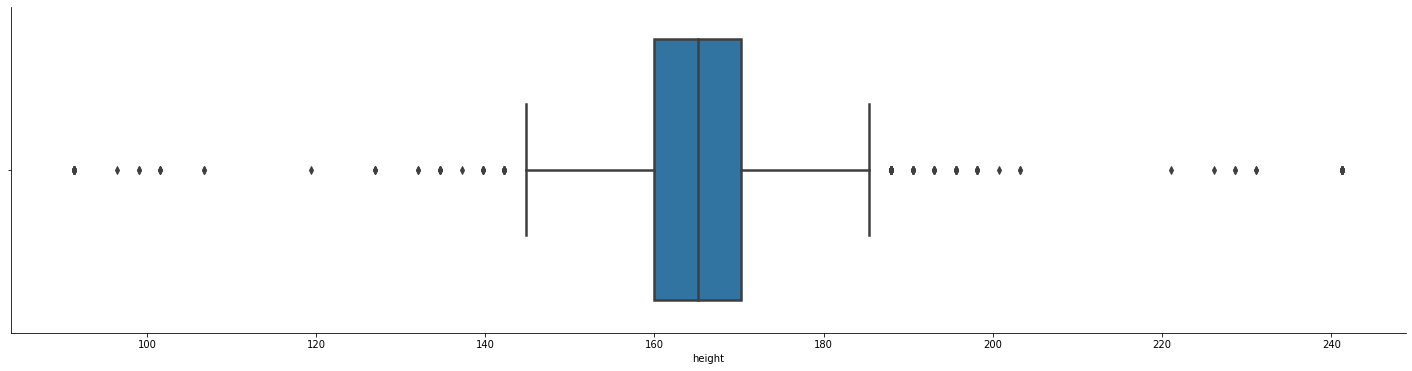

In [26]:
# 25 outliers. Suitable to delete them, but perhaps not all. 
plot_outlier(mc_df.height)

# Missing values is 1107
print(f'Missing values count: {mc_df["height"].isnull().sum()}')

# Drop values > 220 
tall_heights = mc_df[mc_df['height'] > 220].index
# Drop these row indexes from df
mc_df.drop(tall_heights, inplace = True)

# Drop values < 110
short_heights = mc_df[mc_df['height'] < 110].index
mc_df.drop(short_heights, inplace = True)

In [27]:
mc_df[mc_df.height.isnull()].head(20)
# Do look at the output to be able to better understand the inferences!

,item_id,waist,mc_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
3,123373,NaN,21,5.0,dd/e,NaN,Unknown,new,0,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
17,123373,NaN,15,4.0,dddd/g,NaN,36,new,0,NaN,Megan,just right,large,128353,NaN,NaN,NaN,NaN
43,123373,NaN,15,5.0,dd/e,NaN,36,new,0,NaN,sdhewey,just right,fit,670919,NaN,NaN,NaN,NaN
73,124124,NaN,20,4.0,c,NaN,38,new,0,NaN,Fiorella,just right,large,816504,NaN,NaN,NaN,NaN
131,124124,NaN,12,3.0,c,NaN,36,new,0,NaN,jmcrowder.1124,very short,fit,846091,NaN,NaN,NaN,NaN
213,124124,NaN,20,4.0,d,NaN,40,new,0,NaN,rhea_heather,just right,fit,121007,NaN,NaN,NaN,NaN
382,125442,NaN,5,5.0,b,NaN,34,new,0,NaN,kelsi.flatland,just right,large,5752,NaN,NaN,NaN,NaN
423,125442,NaN,7,5.0,c,NaN,34,new,0,NaN,Naomi,just right,fit,563612,NaN,NaN,NaN,NaN
456,125442,NaN,7,5.0,b,NaN,38,new,0,NaN,shirawzn,just right,fit,968605,NaN,NaN,NaN,NaN
475,125442,NaN,7,5.0,dd/e,36.0,30,new,0,NaN,Ingrid,just right,small,940714,NaN,NaN,NaN,NaN


**Investigate the first 20 rows where the height data is missing. What does it tell us about the customers representing these rows?**
the rows where height is missing seems to have cup_size and mc_size, so it's possible that they haven't bought anything where height is relevant.

> This filtering gives us interesting observations here:
> 1. Some customers have given bra_size, cup_size data, whereas all other measurements are empty. **Possible first-time purchase at Modcloth for lingerie!**
> 2. Some customers have given shoe_size and all other measurements are empty. **Possible first-time purchase at Modcloth for shoes!**
>     

**It leads us to saying that there are some first-time buyers in the dataset** (let us remeber this for later)

  **Q:** 

  * How can we support this assumption by looking at the data? 
  
  * How many missing values exist in the height feature. 
  
  * What is a suitable course of action for height feature with missing rows?



In [28]:
#Count and handle missing rows 
height_null_values = mc_df['height'].isnull()
mc_df[height_null_values].isnull().sum().div(height_null_values.sum())*100 # we can look at percentage of other null values for the rows where height is null and see that waist, category, bust and
# shoe_width almost always is null at the same row

# Missing values is 1107
print(f'Missing values count: {mc_df["height"].isnull().sum()}')
# replace null values with "Unknown"
mc_df['height'].fillna('Unknown', inplace = True) 
# Convert data type to categorical
mc_df.height = mc_df.height.astype('category').cat.as_ordered() 

Missing values count: 1107


* **hips:**
Hips column has a lot of missing values ~ 32.28%! We know this data would possibly be missing because Modcloth never got this data from the user most probably. We cannot remove such a significant chunk of the data, so we need another way of handling this feature. We will bin the data- on the basis of quartiles. This is done in the code below. 

* Explain what the code does and what the result is. 


In [29]:
# Handling hips column

# Exchanging empty columns with -1,0
mc_df.hips = mc_df.hips.fillna(-1.0)

# Creating bins 
bins = [-5,0,31,37,40,44,75]

# Creating labels 
labels = ['Unknown','XS','S','M', 'L','XL']

#Using cut to segment and sort data values into bins as categorical values with Xl being largest and Unknown is negative values?
mc_df.hips = pd.cut(mc_df.hips, bins, labels=labels)

mc_df.hips.head(20)

0           M
1          XS
2     Unknown
3     Unknown
4     Unknown
5           L
6     Unknown
7           L
8          XL
9           L
10         XL
11         XL
12    Unknown
13    Unknown
14          S
15         XL
16          L
17    Unknown
18          M
19          S
Name: hips, dtype: category
Categories (6, object): ['Unknown' < 'XS' < 'S' < 'M' < 'L' < 'XL']

* **length:** There are only 35 missing rows in length, we'll take a look at these. We saw that most probably the customers did not leave behind the feedback or the data was corrupted in these rows. However, we should be able to impute these values using review related fields (if they are filled!). Or we could also simply choose to remove these rows. For the sake of this analysis, we will remove these rows.


In [30]:
# Handling length column
missing_rows = mc_df[mc_df.length.isnull()].index
mc_df.drop(missing_rows, axis = 0, inplace=True)

* **quality:** There are only 68 missing rows in quality, we'll took a look at these. Similarly to length, the customers did not leave behind the feedback or the data was corrupted in these rows. We will remove these rows and convert the dtype to an ordinal variable (ordered categorical).

In [31]:
# Handling quality
missing_rows = mc_df[mc_df.quality.isnull()].index
mc_df.drop(missing_rows, axis = 0, inplace=True)
mc_df.quality = mc_df.quality.astype('category').cat.as_ordered()

* **review_summary/ review_text**- The NA values are there because these reviews are simply not provided by customers. Let's just fill those as 'Unknown'.


In [32]:
#Handling review_summare/review_text

mc_df['review_summary'].fillna('Unknown', inplace = True) #replace null values with "Unknown"
mc_df['review_text'].fillna('Unknown', inplace = True) #replace null values with "Unknown"

* **shoe_size** -  Roughly 66.3% of the shoe_size data is missing. We will change the shoe_size into *category* dtype and fill the NA values as 'Unknown'.


In [33]:
#Handling shoe_size
mc_df.shoe_size.fillna('Unknown', inplace = True) 
mc_df.shoe_size= mc_df.shoe_size.astype('category').cat.as_ordered()

* **shoe_width** - Roughly 77.5% of the shoe_width data is missing, drop this column.


In [34]:
#Handling shoe_with
mc_df.drop('shoe_width', axis=1, inplace=True)

* **waist**- Waist column has the highest number of missing values - 96.5%! We will drop this column.


In [35]:
#Handling waist
mc_df.drop('waist', axis=1, inplace=True)

* **bust**- 85.6% missing values and highly correlated to bra_size. Remove.


In [36]:
#Handling bust
mc_df.drop('bust', axis=1, inplace=True)

* **user_name**- user_name itself is not needed with the user_id given. Remove.



In [37]:
#Handling user_name
mc_df.drop('user_name', axis=1, inplace=True)

Run the function for plotting features again to see how the features look like after our changes, only plot categorial variables.

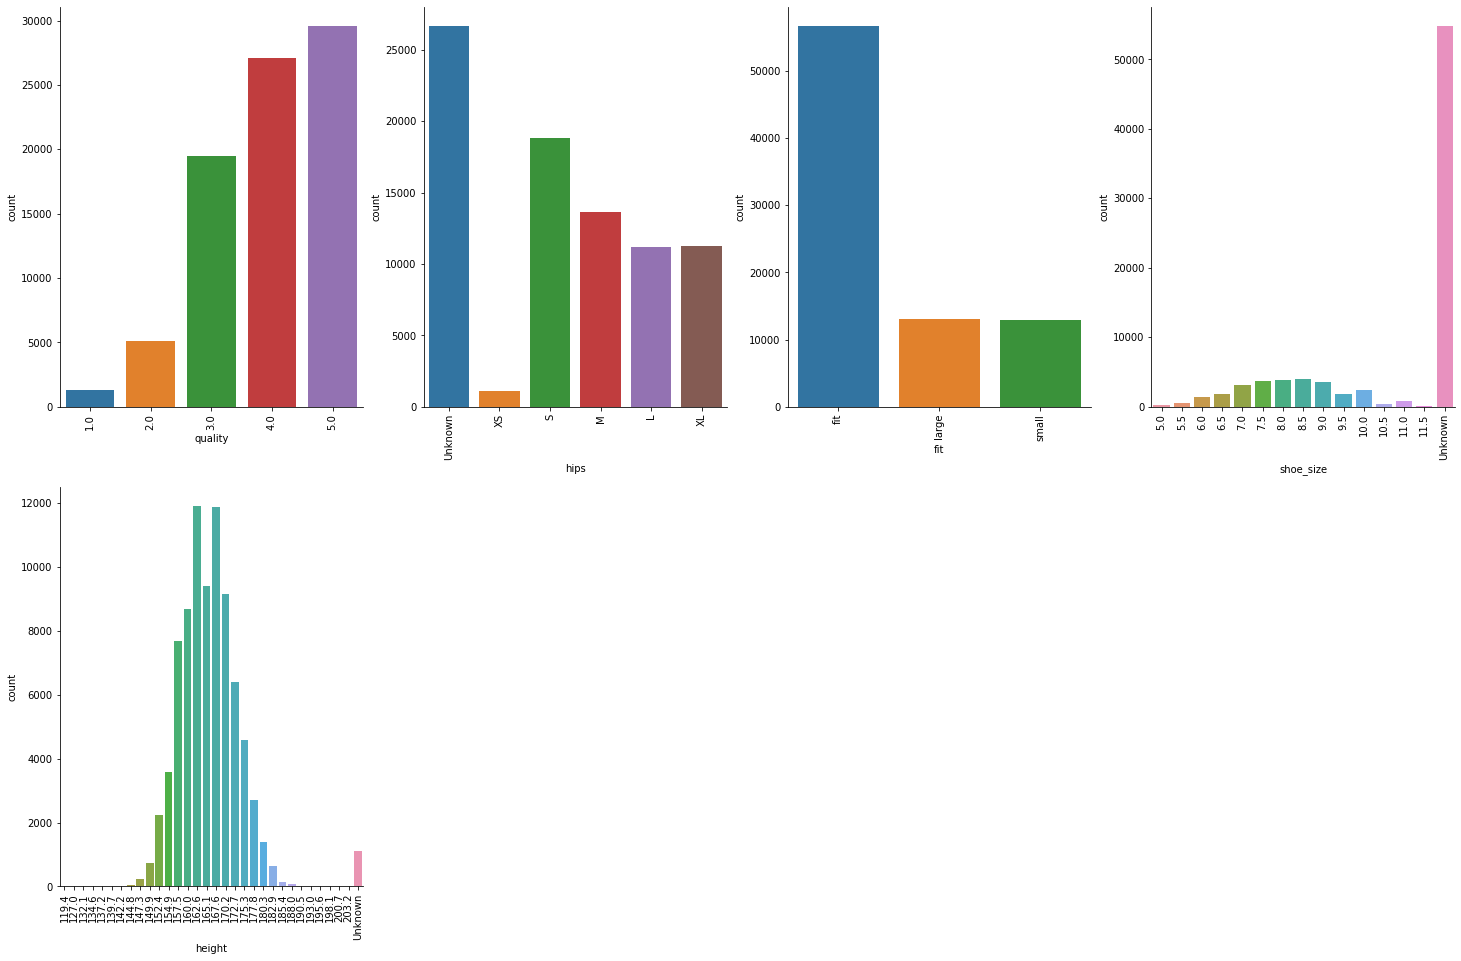

In [38]:
#Create list and call function to plot features
categorical_features_list = ['quality', 'hips', 'fit', 'shoe_size', 'height']

countplot(categorical_features_list)

> # Feature Engineering 
> ## Creating a new feature of first_time_buyer
> 
> Building on our observations above, it makes sense to identify the transactions which belong to first time users. We use the following logic to identify such first time transactions in the dataset:
> * If bra_size/cup_size have a value and height, hips, shoe_size, and waist do not we conclude **it is a first time buyer of lingerie**.
> * If shoe_size have a value and bra_size, cup_size, height, hips, and waist do not we conclude: **it is a first time buyer of shoes**.
> * If hips/waist have a value and bra_size, cup_size, height, shoe_size do not: we conclude: **it is a first time buyer of a dress/tops**.
> 


>Now we add a new column to the original data- *first_time_user*, which is a bool feature which indicates if a user, of a transaction, is a first-time user or not. This is based on the grounds that Modcloth has no previous information about the person, infact it is possible that the new user did multiple transactions in the first time!

In [39]:
# Changed isnull to 'Unknown'

lingerie_cond = (((mc_df.bra_size != 'Unknown') | (mc_df.cup_size != 'Unknown')) & (mc_df.height == 'Unknown') & (mc_df.hips == 'Unknown') &
(mc_df.shoe_size == 'Unknown'))
shoe_cond = ((mc_df.bra_size == 'Unknown') & (mc_df.cup_size == 'Unknown') & (mc_df.height == 'Unknown') & (mc_df.hips == 'Unknown') &
((mc_df.shoe_size != 'Unknown')))
dress_cond = ((mc_df.bra_size == 'Unknown') & (mc_df.cup_size == 'Unknown') & (mc_df.height == 'Unknown') & ((mc_df.hips != 'Unknown')) &
(mc_df.shoe_size == 'Unknown'))


In [40]:
mc_df['first_time_user'] = (lingerie_cond | shoe_cond | dress_cond)
print("Column added!")
print("Total transactions by first time users who bought bra, shoes, or a dress: " + str(sum(mc_df.first_time_user)))
print("Total first time users: " + str(len(mc_df[(lingerie_cond | shoe_cond | dress_cond)].user_id.unique())))

Column added!
Total transactions by first time users who bought bra, shoes, or a dress: 902
Total first time users: 567


**Q**

* How many `first_time_users` did you identify?

* How many transactions were made by `first_time_users` who bought bra, shoes, or a dress?

**Q**

Answer
* **How many `first_time_users` did you identify?**
>567
* **How many transactions were made by `first_time_users` who bought bra, shoes, or a dress?**
>902

**Q** Are there any missing values left in our dataframe?

In [41]:
# Checking dataframe for nullvalues. There is no  missing values left. 
print(mc_df.isna().any().sum()) 

0


**Q** **Are there any missing values left in our dataframe?**
>
**Answer**
>There is no missing values left.


## Distribution of different features 

Now we want to review our remaining features again to see how they look after our cleaning and pre-processing. 

* Call the plotting function again with a list of all categorial values.

* Create a function that plots the continous variables in the dataset and call it with a list of the continous variables. 

**Q**

* What are your observations in regards to the distribution of the data in remaining features? 





In [42]:
#Function for plotting continous features
def plot_dist(df, independent_features):
  plt.figure(figsize=(25, 20))
  for loc, feature in enumerate(independent_features):
    ax = plt.subplot(3, 3, loc+1)
    sns.distplot(df[feature]) # you can try histplot as well
  return None

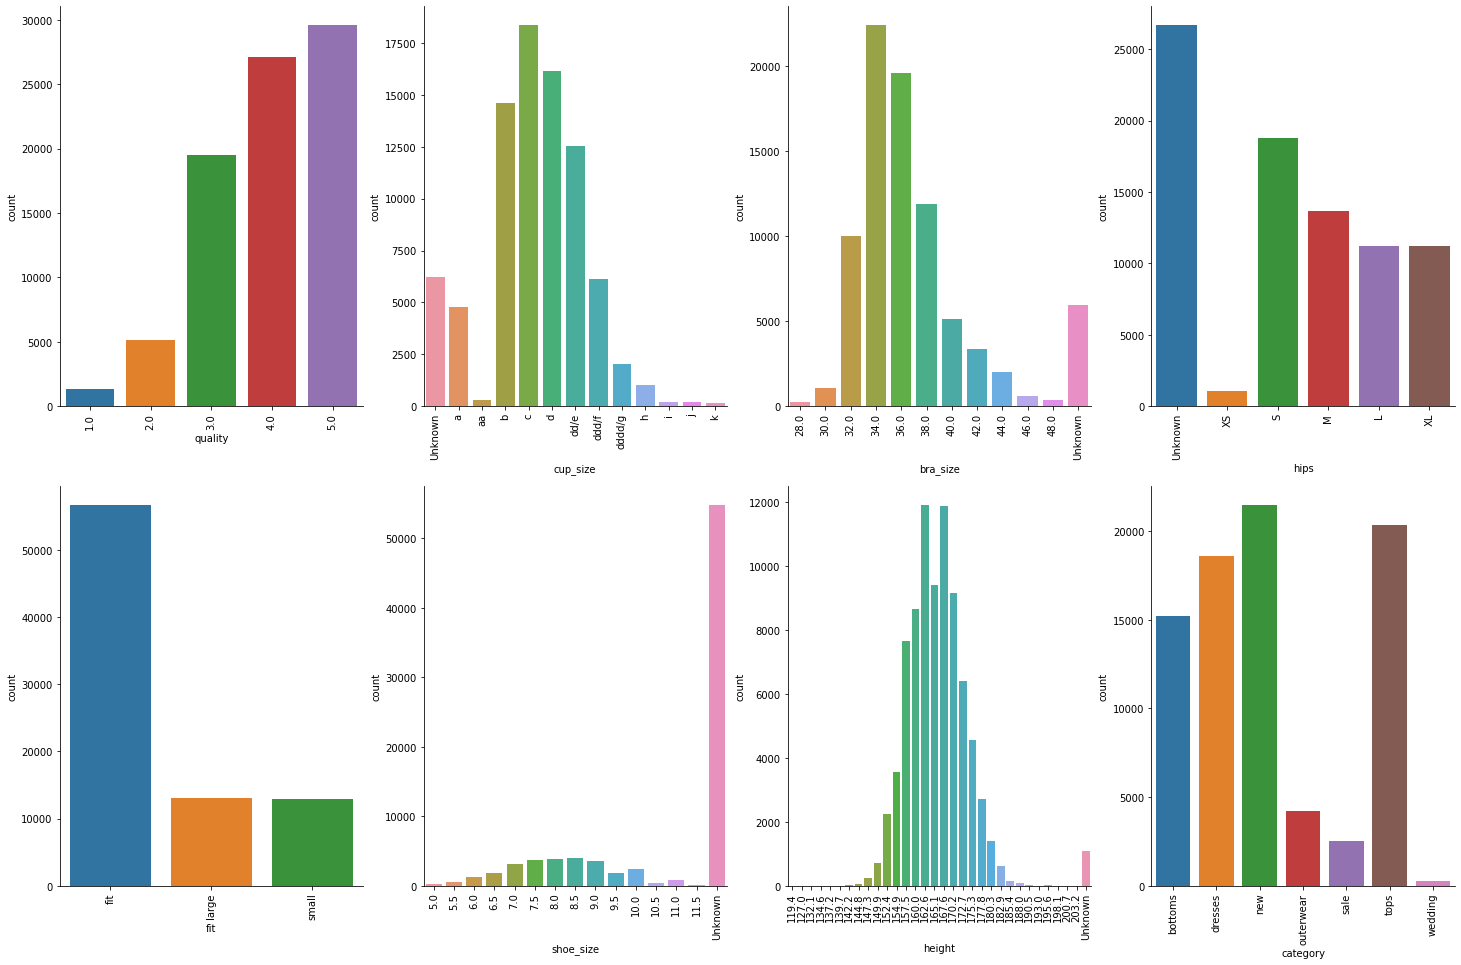

In [43]:
total_categorical_list = ['quality', 'cup_size', 'bra_size', 'hips', 'fit', 'shoe_size', 'height', 'category']
countplot(total_categorical_list)

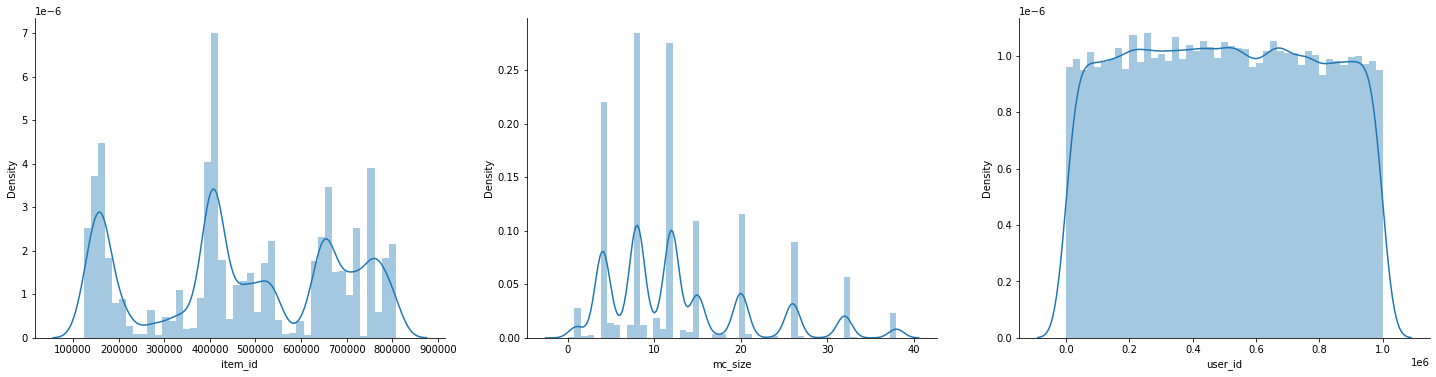

In [44]:
#Call the function to plot the continous features.
total_continous_list = ['item_id', 'mc_size', 'user_id']
plot_dist(mc_df, total_continous_list)

* What do the different visualizations tell us about individual features?

**What do the different visualizations tell us about individual features?**
We can see that the features now are more clean, they all have values such as Unknown instead of null values and the outliers are removed, or replaced. 
The continuous features are coherent when compared to the dataframe in its entirety. The continuity corresponds with the overall data. 

<a id="14"></a>
## Categories vs. Fit, Length and Quality
Here, we will visualize how the items of different categories fared in terms of - fit, length, and quality. This will tell Modcloth which categories need more attention! 

I have plotted 2 distributions in categories here:

**1. Unnormalized**- viewing the frequency counts directly- for comparison across categories. We also include the best fit, length, or quality measure in this plot.

**2. Normalized** -  viewing the distribution for the category after normalizing the counts, amongst the category itself- it will help us compare what are major reason for return amongst the category itself. We exclude the best sizing & quality measures, so as to focus on the pre-dominant reasons of return per category (if any).

In [45]:
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  Modcloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)
    
def norm_counts(t):
    norms = np.linalg.norm(t.fillna(0), axis=1)
    t_norm = t[0:0]
    for row, euc in zip(t.iterrows(), norms):
        t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
    return t_norm

- **Category vs. Fit**

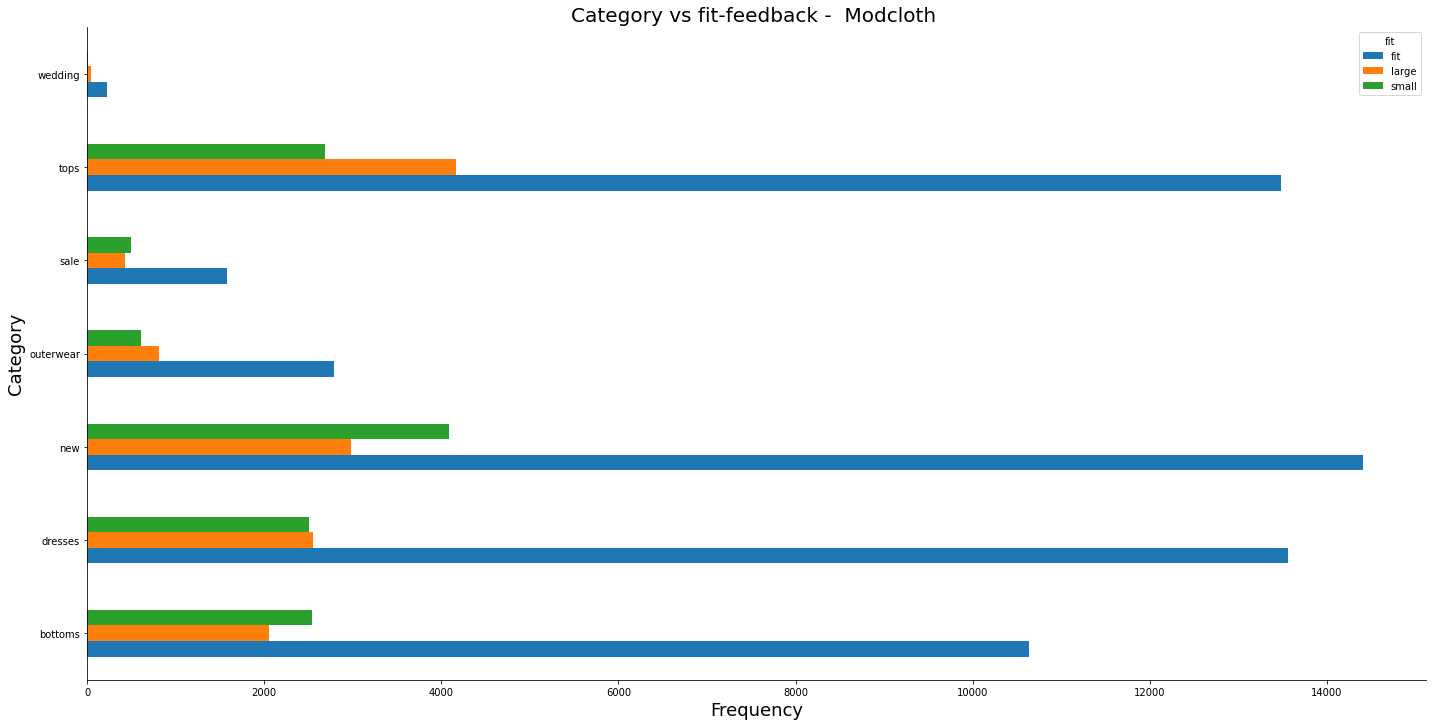

In [46]:
g_by_category = mc_df.groupby('category')
cat_fit = g_by_category['fit'].value_counts()
cat_fit = cat_fit.unstack()
cat_fit_norm = norm_counts(cat_fit)
cat_fit_norm.drop(['fit'], axis=1, inplace=True)
plot_barh(cat_fit, 'fit')

In [47]:
# print percentage of each category so we can see the ones with best fitness
for i in range(len(cat_fit.index)):
  print((cat_fit.iloc[i]/cat_fit.iloc[i].sum()*100).round(2))

fit
fit      69.85
large    13.48
small    16.67
Name: bottoms, dtype: float64
fit
fit      72.83
large    13.72
small    13.44
Name: dresses, dtype: float64
fit
fit      67.10
large    13.87
small    19.03
Name: new, dtype: float64
fit
fit      66.16
large    19.35
small    14.49
Name: outerwear, dtype: float64
fit
fit      63.14
large    17.05
small    19.81
Name: sale, dtype: float64
fit
fit      66.32
large    20.47
small    13.22
Name: tops, dtype: float64
fit
fit      79.64
large    15.64
small     4.73
Name: wedding, dtype: float64



* Which categories have the best fit response (`fit`)  
* Which categories have the worst fit-feedback?  


**Which categories have the best fit response (`fit`)** 
Categories with the best fit ( > 70% fit): Dresses, wedding
**Which categories have the worst fit-feedback?**
Categories with the worst fit ( < 67% fit): Sale (63%), Outerwear (66%), tops (66%). 

- **Category vs Length**

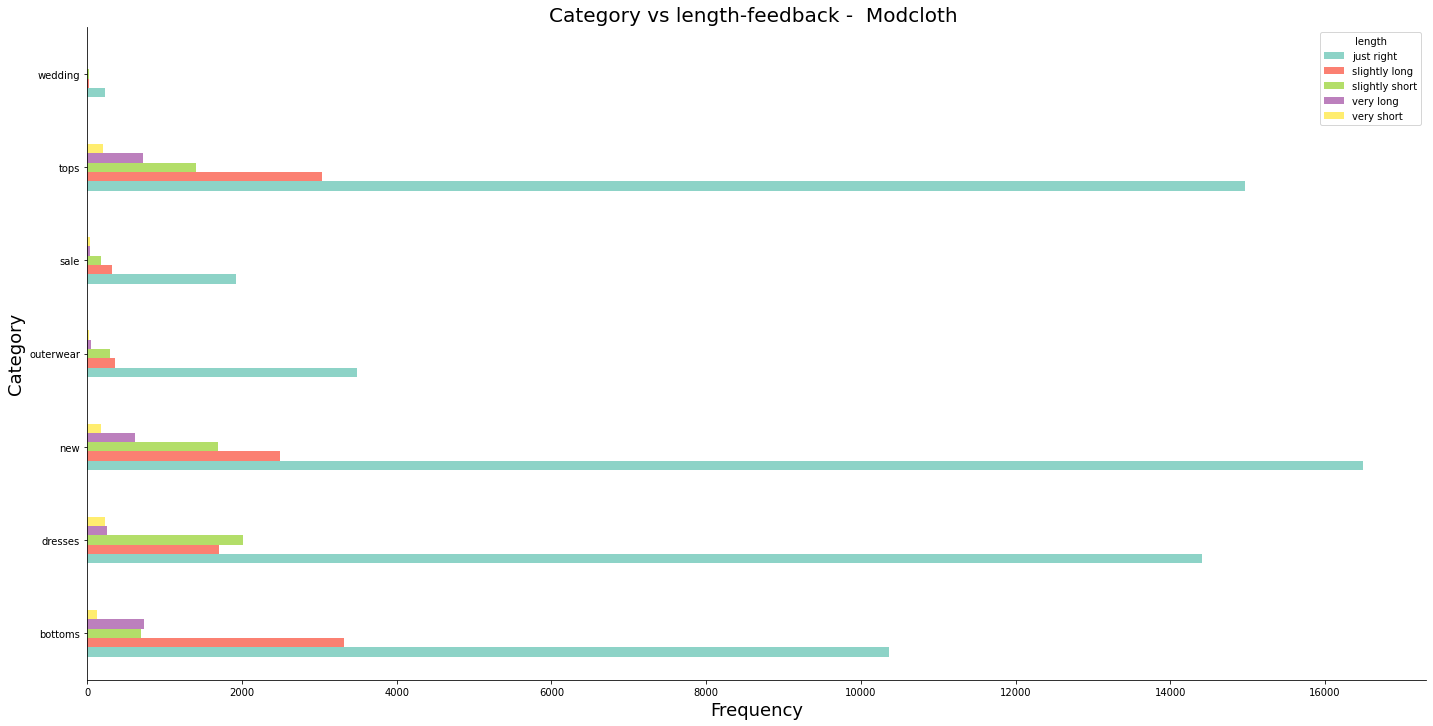

In [48]:
cat_len = g_by_category['length'].value_counts()
cat_len = cat_len.unstack()
plot_barh(cat_len, 'length', 'Set3')


**Q** Which reason is the most common for returning clothes? 

In [49]:
# print percentage of each category to see frequency of length
for i in range(len(cat_len.index)):
  print((cat_len.iloc[i]/cat_len.iloc[i].sum()*100).round(2))

length
just right        68.04
slightly long     21.80
slightly short     4.52
very long          4.79
very short         0.84
Name: bottoms, dtype: float64
length
just right        77.41
slightly long      9.13
slightly short    10.82
very long          1.39
very short         1.25
Name: dresses, dtype: float64
length
just right        76.81
slightly long     11.59
slightly short     7.87
very long          2.90
very short         0.83
Name: new, dtype: float64
length
just right        82.81
slightly long      8.49
slightly short     7.04
very long          1.16
very short         0.50
Name: outerwear, dtype: float64
length
just right        76.80
slightly long     12.82
slightly short     7.31
very long          1.52
very short         1.56
Name: sale, dtype: float64
length
just right        73.58
slightly long     14.93
slightly short     6.94
very long          3.57
very short         0.98
Name: tops, dtype: float64
length
just right        82.18
slightly long      7.64
slightly sh

**Which reason is the most common for returning clothes?**
Slightly long seems to be the most common issue that the customers are experiencing in terms of length. And "large" seems to be the most common issue in terms of fitness.
So the reason is overall size/shape of the product. 


<a id="15"></a>
### Total Number of Users vs Total Number of items bought

**Q** What percantage of customers bought only one item at a single transaction? 


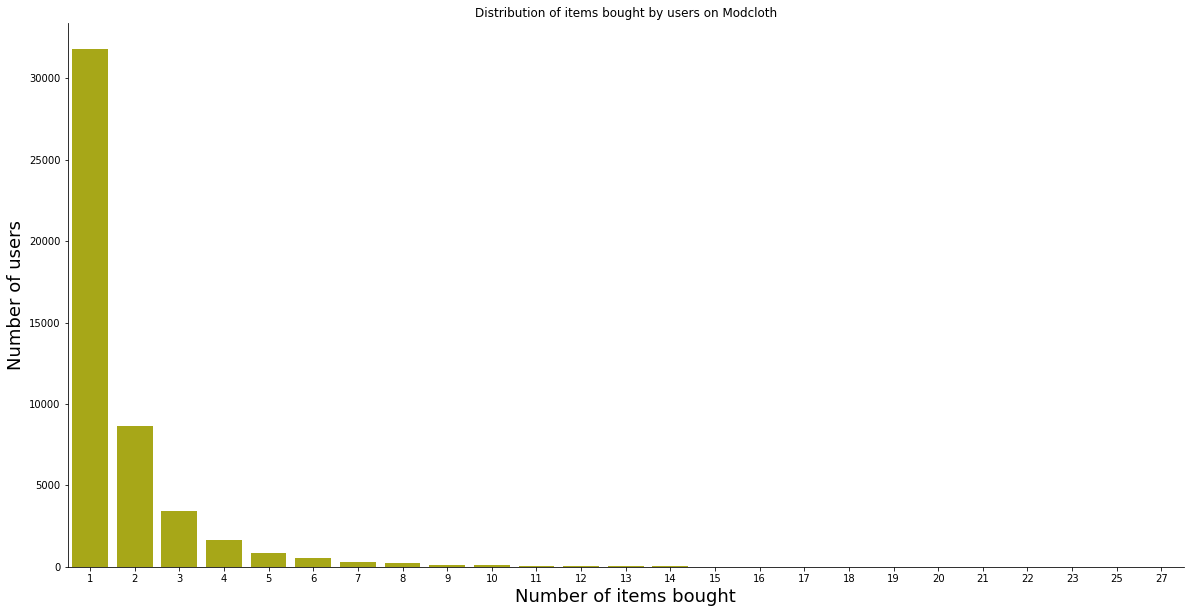

In [50]:
# Users who bought so many items
items_bought = []
total_users = []
for i in range(min(mc_df.user_id.value_counts()), max(mc_df.user_id.value_counts())+1):
    all_users = sum(mc_df.user_id.value_counts() == i)
    if all_users != 0:
        total_users.append(all_users)
        items_bought.append(i)
plt.xlabel("Number of items bought", fontsize = 18)
plt.ylabel("Number of users", fontsize = 18)
plt.title("Distribution of items bought by users on Modcloth")
__ = sns.barplot(x=items_bought, y=total_users, color='y')
fig = plt.gcf()
fig.set_size_inches(20,10)

In [51]:
#What percentage of users bought only one item at a single transaction? 
print('Percentage of users who bought one item:', round(total_users[0]/sum(total_users)*100, 2))
#answer 66.42 %

Percentage of users who bought one item: 66.42


**What percentage of customers bought only one item at a single transaction?**
66.42 %

<a id="16"></a>
## Height vs shoe_size -  Modcloth customers
It would be interesting to see if there exists a linear relation between the height of a person and their shoe-size, i.e.- it will mean shoe-size increases with increase in height!

* Investigate the correlation between shoe_size and height for the customers of Modcloth. 

* Create a visualisation that show the correlation between the two variables. 

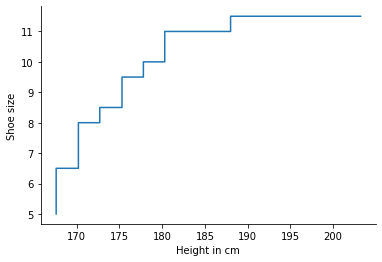

In [52]:
import matplotlib.pyplot as plt
plt.plot(pd.to_numeric(mc_df['height'],errors='coerce').sort_values(ascending = False), pd.to_numeric(mc_df['shoe_size'],errors='coerce').sort_values(ascending = False))

plt.xlabel("Height in cm") #height in cms
plt.ylabel("Shoe size") #shoe_size
plt.show()

# Alternative below
#x = mc_df['shoe_size'] = pd.to_numeric(mc_df['shoe_size'], errors = 'coerce')
#y = mc_df['height'] = pd.to_numeric(mc_df['height'], errors = 'coerce')

#sns.jointplot(x,y,  kind="reg")